In [1]:
import pandas as pd
import missingno as msno
from functions import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read in the Data w/ explicit column names

In [2]:
column_names = ['age' , 'workclass' , 'fnlwgt' , 'education' , 'education_num' , 'marital_status' , 'occupation' , 'relationship' , 'race' , 'sex' , 'capital_gain' , 'capital_loss' , 'hours_per_week' , 'native_country', "target"]

adultDF = pd.read_csv('./data/adult.data', index_col=False, names=column_names)

# Clean the Data

### Strip the data of all white space

In [3]:
adultDF = strip_spaces(adultDF)

stripped leading/trailing spaces from all cells of string type


## Review potential placeholders values

In [4]:
for column in adultDF.columns:
    print(column, '\n', 
          adultDF[column].unique(), '\n')

age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

fnlwgt 
 [ 77516  83311 215646 ...  34066  84661 257302] 

education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

education_num 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital_status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-

### replace all '?' marks with NaN values

In [5]:
columns_with_placeholders = ['workclass', 'occupation', 'native_country']
adultDF = replace_column_w_nan(adultDF, columns_with_placeholders, "?")

Replaced ? values from these columns:['workclass', 'occupation', 'native_country']


### Continue reviewing potential placeholder values

In [6]:
adultDF.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
for column in adultDF.columns:
    print(adultDF[column].value_counts().sort_index(ascending=False)[:5], "\n")

90    43
88     3
87     1
86     1
85     3
Name: age, dtype: int64 

Without-pay            14
State-gov            1298
Self-emp-not-inc     2541
Self-emp-inc         1116
Private             22696
Name: workclass, dtype: int64 

1484705    1
1455435    1
1366120    1
1268339    1
1226583    1
Name: fnlwgt, dtype: int64 

Some-college     7291
Prof-school       576
Preschool          51
Masters          1723
HS-grad         10501
Name: education, dtype: int64 

16     413
15     576
14    1723
13    5355
12    1067
Name: education_num, dtype: int64 

Widowed                    993
Separated                 1025
Never-married            10683
Married-spouse-absent      418
Married-civ-spouse       14976
Name: marital_status, dtype: int64 

Transport-moving    1597
Tech-support         928
Sales               3650
Protective-serv      649
Prof-specialty      4140
Name: occupation, dtype: int64 

Wife              1568
Unmarried         3446
Own-child         5068
Other-relative     98

From this report we can see that when it comes to columns like `capital_loss`, `hours_per_week`, and even `age`, although we see max values way past the 75th percentile, they aren't isolated instances. There are actually clusters of high values, which indicates that there might be a trend.

On the other hand, the `capital_gain` column shows 159 instances of an isolated value of 99,999. The next closest value is 41k, which indicates that the value 99,999 is likely a placeholder that needs to be addressed.

In [8]:
adultDF = replace_column_w_nan(adultDF, ['capital_gain'], 99999)
# add 'capital_gain' to columns_with_placeholders list for next cells' process
columns_with_placeholders.append("capital_gain")

Replaced 99999 values from these columns:['capital_gain']


### Drop NaN rows

In [9]:
# Report percentage of missing rows in a specific column.
for column in columns_with_placeholders:
    missing_values = adultDF[column].isna().sum()
    total_rows = adultDF.shape[0]
    percentage = round((missing_values / total_rows) * 100, 2) 
    print("The {} column is missing {}% of rows".format(column, percentage))

The workclass column is missing 5.64% of rows
The occupation column is missing 5.66% of rows
The native_country column is missing 1.79% of rows
The capital_gain column is missing 0.49% of rows


Because of the results above, we can remove rows without significantly affecting our data

In [10]:
adultDF = drop_na_rows(adultDF, columns_with_placeholders)

Removed NA rows from these columns:['workclass', 'occupation', 'native_country', 'capital_gain'].


### Drop Duplicates

In [11]:
# Calculate the percentage of duplicated data
round(adultDF.duplicated().sum()/adultDF.shape[0]*100, 2)

0.08

Because only .08% of our data is duplicated, we can remove these rows without much affect

In [12]:
adultDF = adultDF.drop_duplicates()
check_duplicates(adultDF)

You're all clear of duplicates


# Review First Round of DataCleaning

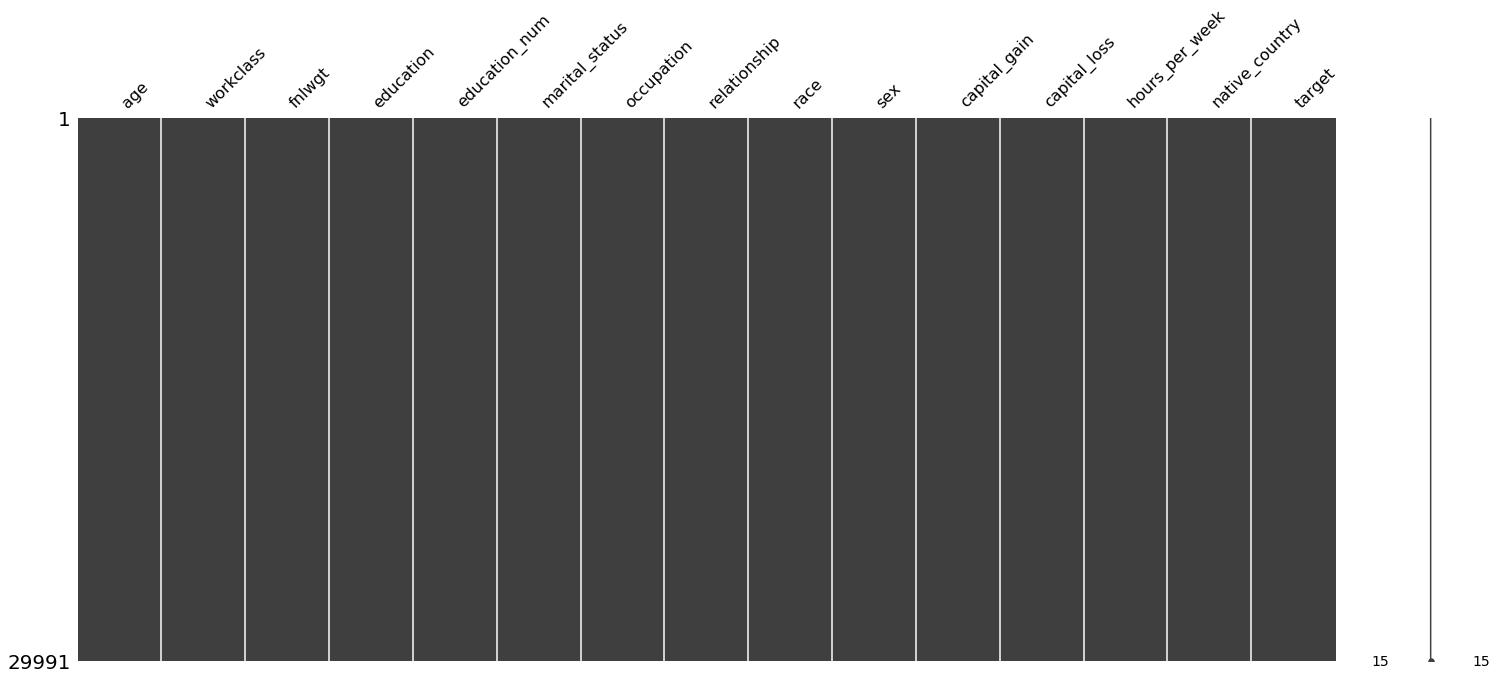

In [13]:
msno.matrix(adultDF)

At this point, we have stripped all white spaces, removed 24 duplicates, replaced '?' and '99,999' values with NaNs, and finally dropped all rows with missing values.

We don't see a need to drop any columns for cleaned data - we'll leave that for the model notebook to determine which columns are relevant or not. 

# Prepare Data For Pickling

## Change target to binary column

In [14]:
adultDF.target.unique()

array(['<=50K', '>50K'], dtype=object)

In [15]:
adultDF.target = adultDF.target.map(lambda x: np.where(x == '>50K', 1, 0))

adultDF.target.unique()

array([0, 1])

#### Review balance

In [16]:
adultDF.target.value_counts(normalize=True)

0    0.75466
1    0.24534
Name: target, dtype: float64

Based on the results above, we can see that we have an imbalance of data and will require scaling to mitigate affects. 

## Dummify categorical columns

In [17]:
categorical_columns = ['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'marital_status', 'native_country']
dummy_df = pd.get_dummies(adultDF, columns=categorical_columns)
dummy_col_list = list(dummy_df.columns)
dummy_col_list.remove('target')

# Consider Splitting before Scaling. 
Usually we would want to split the data first, mention the state of the balance, then use the fit transform on train and fit on test. <- double check this with Nick

fit_transform the training data
transform the test data

## Train/Test Split the Data

In [18]:
dummy_df.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'target', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private',
       ...
       'native_country_Portugal', 'native_country_Puerto-Rico',
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia'],
      dtype='object', length=105)

In [19]:
X = dummy_df.drop(columns='target')
y = dummy_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40, stratify=y)

## Scale the Data

In [20]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## Pickle the Data

In [21]:
X_train_pickle = pd.to_pickle(X_train_sc, './data/X_train_pickle.pkl')
X_test_pickle = pd.to_pickle(X_test_sc, './data/X_test_pickle.pkl')
y_train_pickle = pd.to_pickle(y_train, './data/y_train_pickle.pkl')
y_test_pickle = pd.to_pickle(y_test, './data/y_test_pickle.pkl')